In [1]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from langdetect import detect

In [2]:
df = pd.read_csv('bert_tweets.csv')

In [3]:
df['timestamp'] =  pd.to_datetime(df['timestamp'],errors='coerce')

In [4]:
df.head()

,id,user,fullname,url,timestamp,replies,likes,retweets,text,quantity,preprocessed_text_roberta,preprocessed_text_finbert,preprocessed_text,language
0,1078873154376880129,TheBitfi,Bitfi - open source: bitfi.dev,NaN,2018-12-29 04:39:39+00:00,9,61,16,The first lab made diamond happened in 1955 &a...,1,The first lab made diamond happened in 1955 &a...,The first lab made diamond happened in 1955 &a...,first lab made diamond happened amp flawless m...,en
1,1108499115334348801,Airdropnotecom,Crypto Airdrops,NaN,2019-03-20 22:42:38+00:00,2,8,8,#Bitcoin #Satoshi #crypto\nCrypto Wallet #XAPO...,1,#Bitcoin #Satoshi #crypto\nCrypto Wallet #XAPO...,#Bitcoin #Satoshi #crypto\nCrypto Wallet #XAPO...,bitcoin satoshi crypto crypto wallet xapo xapo...,en
2,1084106234721169410,ModDre1982,Mod Dre1982,NaN,2019-01-12 15:14:02+00:00,0,5,9,I miss those days at DuckDice. :-(\n\nWanna tr...,1,I miss those days at DuckDice. :-(\n\nWanna tr...,I miss those days at DuckDice. :-(\n\nWanna tr...,miss days duckdice wanna try gt bitcoin gamble...,en
3,1111185767244746752,northernbtc,Northern Bitcoin AG,NaN,2019-03-28 08:38:26+00:00,3,653,62,Digitisation facilitates our lives and relieve...,1,Digitisation facilitates our lives and relieve...,Digitisation facilitates our lives and relieve...,digitisation facilitates lives relieves everyd...,en
4,1097491617282310144,BitBall_Erc20,BitBall BTB - Trade with the world #NoFakeProm...,NaN,2019-02-18 12:42:46+00:00,3,39,32,#Bitcoin #Btc has picked up and turned the who...,1,#Bitcoin #Btc has picked up and turned the who...,#Bitcoin #Btc has picked up and turned the who...,bitcoin btc has picked turned whole market gre...,en


In [5]:
df['quantity'] = 1

In [6]:
df_num = df.resample('6h', on='timestamp').agg({'quantity':'sum'})

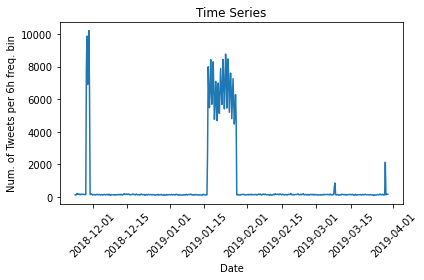

In [7]:
# Select the column of interest
column = df_num['quantity']

# Plot the time series
plt.plot(column)
plt.xlabel('Date')
plt.ylabel('Num. of Tweets per 6h freq. bin')
plt.title('Time Series')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('num_tweets.png')

plt.show()

In [8]:
sdf = pd.read_csv("final_data.csv")

In [10]:
xfmt = mdates.DateFormatter('%d-%m')

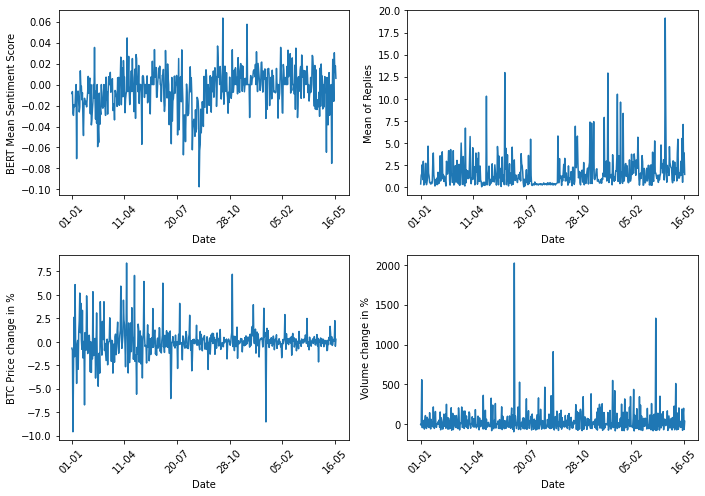

In [29]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(10, 7))

# Plot the second figure on the right subplot (ax2)
ax1.plot(sdf['BERT_Sentiment_mean'])
ax1.set_xlabel('Date')
ax1.set_ylabel('BERT Mean Sentiment Score')
ax1.tick_params('x',labelrotation=45)
ax1.xaxis.set_major_formatter(xfmt)

# Plot the second figure on the right subplot (ax2)
ax2.plot(sdf['replies_mean'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Mean of Replies')
ax2.tick_params('x',labelrotation=45)
ax2.xaxis.set_major_formatter(xfmt)

# Plot the second figure on the right subplot (ax2)
ax3.plot(sdf['btc_price_per']*100)
ax3.set_xlabel('Date')
ax3.set_ylabel('BTC Price change in %')
ax3.tick_params('x',labelrotation=45)
ax3.xaxis.set_major_formatter(xfmt)

# Plot the second figure on the right subplot (ax2)
ax4.plot(sdf['volume_sum_per']*100)
ax4.set_xlabel('Date')
ax4.set_ylabel('Volume change in %')
ax4.tick_params('x',labelrotation=45)
ax4.xaxis.set_major_formatter(xfmt)

plt.tight_layout()

plt.savefig('time_series.png')

plt.show()


In [12]:
btc = pd.read_csv('btcusd.csv')

In [13]:
btc['time'] =  pd.to_datetime(btc['time'], unit='ms')

In [14]:
mask = (btc['time'].dt.date > datetime(2021, 4, 25).date()) & (btc['time'].dt.date <= datetime(2021, 7, 5).date())
btc = btc.loc[mask]

In [15]:
frequency = '3H'

In [16]:
btc = btc.resample(frequency, on='time').agg({'close':'last','volume':'sum'})
btc.rename(columns={'close': 'btc_price', 'volume': 'volume_sum'}, inplace=True)

In [19]:
index_value1 = pd.to_datetime('2021-05-13 00:00:00')
row_number1 = btc.index.get_loc(index_value1)

In [20]:
index_value2 = pd.to_datetime('2021-05-16 21:00:00')
row_number2 = btc.index.get_loc(index_value2)

In [21]:
index_value3 = pd.to_datetime('2021-05-17 09:00:00')
row_number3 = btc.index.get_loc(index_value3)

In [22]:
index_value4 = pd.to_datetime('2021-06-04 21:00:00')
row_number4 = btc.index.get_loc(index_value4)

In [23]:
index_value5 = pd.to_datetime('2021-06-13 03:00:00')
row_number5 = btc.index.get_loc(index_value5)

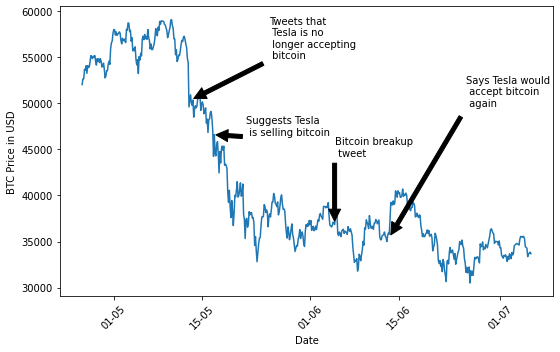

In [24]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

ax1.plot(btc['btc_price'])
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price in USD')
ax1.tick_params('x',labelrotation=45)
ax1.annotate('Tweets that \n Tesla is no \n longer accepting \n bitcoin',
             xy=(btc.index[row_number1], btc['btc_price'][row_number1]),
             xytext=(btc.index[row_number1+100], btc['btc_price'][row_number1-3]),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate('Suggests Tesla \n is selling bitcoin',
             xy=(btc.index[row_number2], btc['btc_price'][row_number2]),
             xytext=(btc.index[row_number2+40], btc['btc_price'][row_number2]),
             arrowprops=dict(facecolor='black', shrink=0.05))

ax1.annotate('Bitcoin breakup \n tweet',
             xy=(btc.index[row_number4], btc['btc_price'][row_number4]),
             xytext=(btc.index[row_number4], btc['btc_price'][row_number4-150]),
             arrowprops=dict(facecolor='black', shrink=0.05))
ax1.annotate('Says Tesla would \n accept bitcoin \n again',
             xy=(btc.index[row_number5], btc['btc_price'][row_number5]),
             xytext=(btc.index[row_number5+100], btc['btc_price'][row_number5-240]),
             arrowprops=dict(facecolor='black', shrink=0.05))
xfmt = mdates.DateFormatter('%d-%m')
ax1.xaxis.set_major_formatter(xfmt)
plt.tight_layout()
plt.savefig('musk_plot2.png')

plt.show()

In [25]:
df_bert = pd.read_csv('data_varp_bert.csv')
df_bert['dates'] =  pd.to_datetime(df_bert['dates'],errors='coerce')
df_bert = df_bert.set_index("dates")
df_bert.rename(columns={'BTC_per': 'BTC', 'varp_forecast': 'VAR forecast finBERT'}, inplace=True)

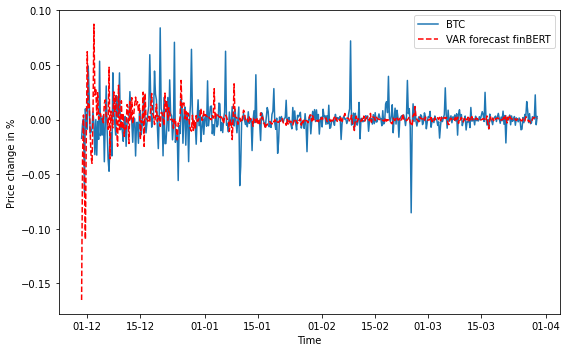

In [26]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(df_bert['BTC'], '-', label='BTC')
ax1.plot(df_bert['VAR forecast finBERT'], '--',label='VAR forecast finBERT', color='red')
ax1.legend()
ax1.set_xlabel('Time')
ax1.set_ylabel('Price change in %')
xfmt = mdates.DateFormatter('%d-%m')
ax1.xaxis.set_major_formatter(xfmt)
plt.tight_layout()
plt.savefig("var_bert.png")
plt.show()

In [27]:
df_ar = pd.read_csv('data_ar.csv')
df_ar['dates'] =  pd.to_datetime(df_ar['dates'],errors='coerce')
df_ar = df_ar.set_index("dates")
df_ar.rename(columns={'BTC_per': 'BTC', 'forecast_ar': 'AR forecast'}, inplace=True)

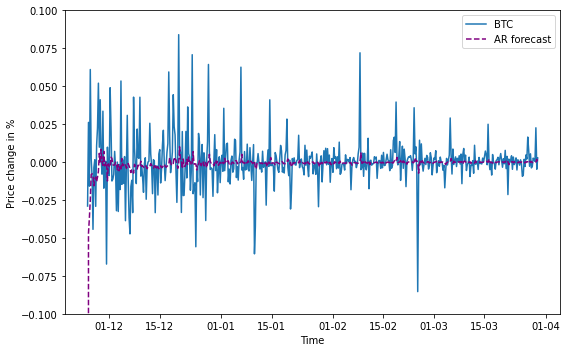

In [28]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))
ax1.plot(df_ar['BTC'], '-', label='BTC')
ax1.plot(df_ar['AR forecast'], '--',label='AR forecast', color='purple')
ax1.legend()
ax1.set_xlabel('Time')
ax1.set_ylabel('Price change in %')


xfmt = mdates.DateFormatter('%d-%m')
ax1.xaxis.set_major_formatter(xfmt)
plt.ylim(-0.1, 0.1)
plt.tight_layout()
plt.savefig("ar.png")
plt.show()